In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
tasks = pd.read_csv('data/task_report_30_3.csv')
task_detail = pd.read_csv('data/task_30.csv')
projects = pd.read_csv('data/project_report_30_3.csv')
project_detail = pd.read_csv('data/project_30.csv')

In [30]:
def isWeekend(date):
    return date.weekday() >= 5

In [31]:
projects['Progress'] = projects['Completedtask']/projects['TotalTask']*100

projects['Date'] = pd.to_datetime(projects['Date'])
projects['StartDate'] = pd.to_datetime(projects['StartDate'])
projects['EndDate'] = pd.to_datetime(projects['EndDate'])
projects['ActualStartDate'] = pd.to_datetime(projects['ActualStartDate'])
projects['ActualEndDate'] = pd.to_datetime(projects['ActualEndDate'])

projects['Weekend'] = projects['Date'].apply(lambda x: isWeekend(x)).astype(int)
projects['DayCount'] = (projects['Date']-projects['StartDate']).dt.days 
projects['Delay'] = (projects['ActualEndDate'] - projects['EndDate']).dt.days

In [32]:
test_idx = projects.loc[tasks['ProjectID'].isin([26,27,28,29,30])].index.tolist()

In [33]:
projects_df =  projects.drop(columns=['Date','ProjectID','StartDate','EndDate','ActualStartDate','ActualEndDate'])
projects_df = projects_df.astype(float)

In [34]:
columns = projects_df.columns.tolist()
target = 'Delay'
features = columns.copy()
features.remove(target)

<Axes: >

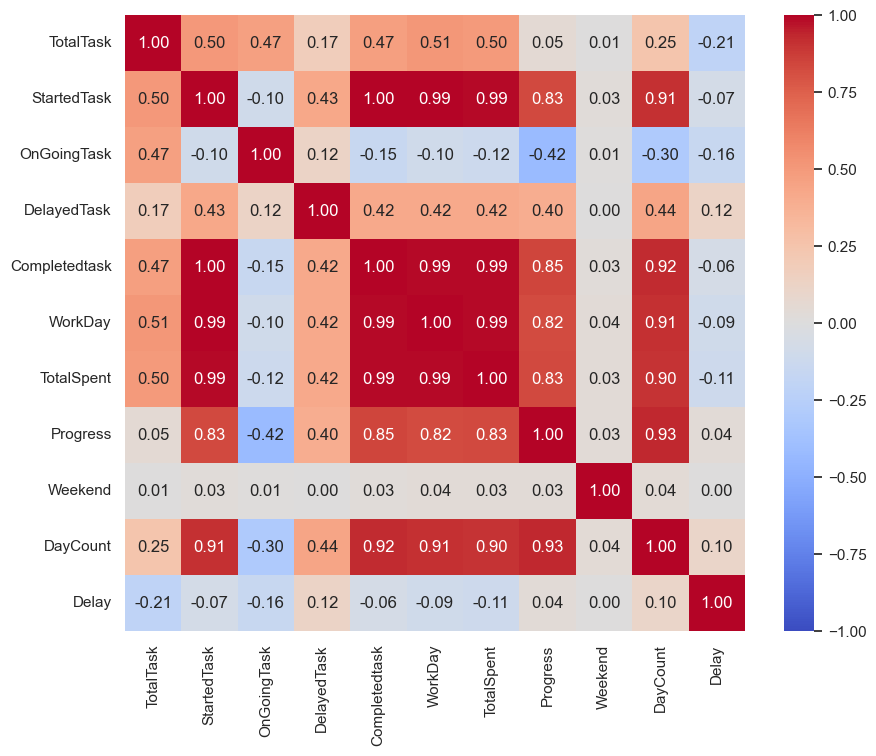

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(projects_df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap='coolwarm')

<Axes: >

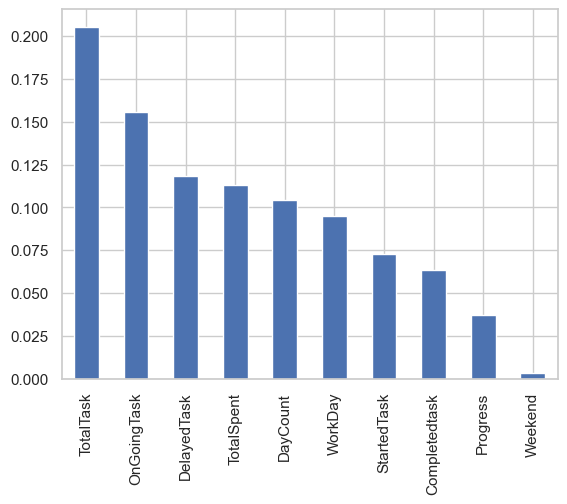

In [36]:
projects_df.corr()[target].abs().sort_values(ascending=False).iloc[1:].plot(kind='bar')

In [37]:
projects_df['Delay'].value_counts().sort_index()

Delay
0.0    148
1.0    361
2.0    244
3.0    248
4.0    167
5.0    185
6.0     63
7.0    291
8.0    127
Name: count, dtype: int64

<Axes: xlabel='Delay', ylabel='Density'>

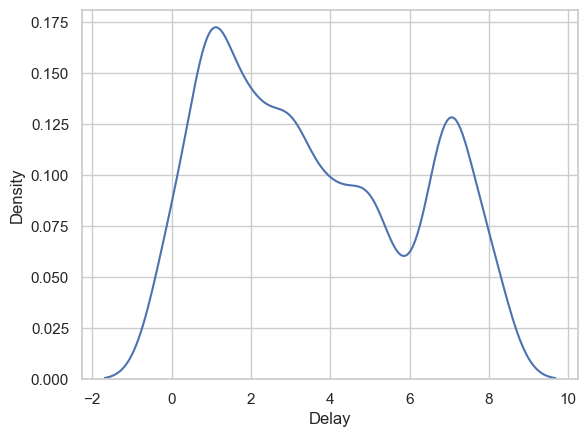

In [38]:
sns.kdeplot(projects_df['Delay'])

In [39]:
X = projects_df.copy()
y = X.pop(target)

X_train = X[~X.index.isin(test_idx)]
y_train = y[~y.index.isin(test_idx)]
X_test = X[X.index.isin(test_idx)]
y_test = y[y.index.isin(test_idx)]

# Creating and training the decision tree regression model
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print("Train MAE :", mae_train, " | Test MAE : ", mae_test)

Train MAE : 1.0995277436810604  | Test MAE :  1.2579808061119164


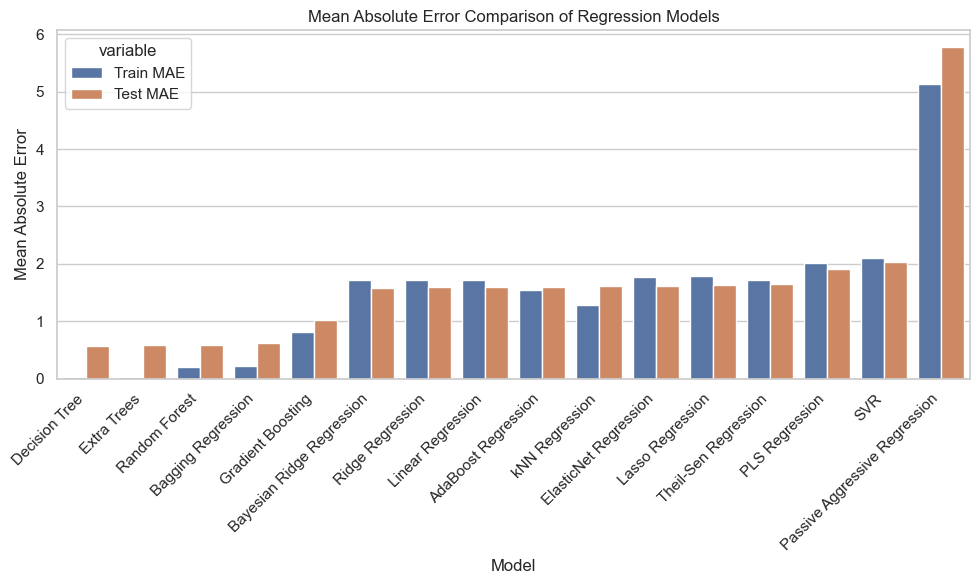

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

def evaluate_regression_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet(),
        "SVR": SVR(),
        "kNN Regression": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Extra Trees": ExtraTreesRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Bagging Regression": BaggingRegressor(),
        "AdaBoost Regression": AdaBoostRegressor(),
        "PLS Regression": PLSRegression(),
        "Bayesian Ridge Regression": BayesianRidge(),
        "Passive Aggressive Regression": PassiveAggressiveRegressor(),
        "Theil-Sen Regression": TheilSenRegressor()
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        results.append({"Model": name, "Train MAE": mae_train, "Test MAE": mae_test})
    
    return pd.DataFrame(results)

# Assuming X_train, y_train, X_test, y_test are defined
results_df = evaluate_regression_models(X_train, y_train, X_test, y_test)
results_df.sort_values(by='Test MAE', inplace=True)

# Plotting using seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
ax.set_title('Mean Absolute Error Comparison of Regression Models')
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()